In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns; sns.set()


In [2]:
df = pd.read_csv('owid-covid-data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15128 entries, 0 to 15127
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  14938 non-null  object 
 1   location                  15128 non-null  object 
 2   date                      15128 non-null  object 
 3   total_cases               15128 non-null  int64  
 4   new_cases                 15128 non-null  int64  
 5   total_deaths              15128 non-null  int64  
 6   new_deaths                15128 non-null  int64  
 7   total_cases_per_million   14836 non-null  float64
 8   new_cases_per_million     14836 non-null  float64
 9   total_deaths_per_million  14836 non-null  float64
 10  new_deaths_per_million    14836 non-null  float64
 11  total_tests               3747 non-null   float64
 12  new_tests                 3347 non-null   float64
 13  total_tests_per_thousand  3747 non-null   float64
 14  new_te

In [126]:
ndf=df[df.location != 'World']

In [93]:
df_c_30=ndf.groupby('location')['new_cases'].sum().nlargest(30)

In [94]:
shape=df_c_30.shape
print('df_c_30 shape is{}'.format(shape))

df_c_30 shape is(30,)


In [95]:
df_c_30

location
United States     1158041
Spain              217466
Italy              210717
United Kingdom     186599
Germany            163175
Russia             134687
France             131287
Turkey             126045
Brazil             101147
Iran                97424
China               83964
Canada              59474
Belgium             49906
Peru                45928
India               42533
Netherlands         40571
Switzerland         29822
Ecuador             29538
Saudi Arabia        27011
Portugal            25282
Mexico              23471
Sweden              22317
Ireland             21506
Pakistan            20186
Chile               19663
Singapore           18205
Belarus             16705
Israel              16208
Austria             15597
Qatar               15551
Name: new_cases, dtype: int64

In [96]:
df_c_30.index  #this is a list

Index(['United States', 'Spain', 'Italy', 'United Kingdom', 'Germany',
       'Russia', 'France', 'Turkey', 'Brazil', 'Iran', 'China', 'Canada',
       'Belgium', 'Peru', 'India', 'Netherlands', 'Switzerland', 'Ecuador',
       'Saudi Arabia', 'Portugal', 'Mexico', 'Sweden', 'Ireland', 'Pakistan',
       'Chile', 'Singapore', 'Belarus', 'Israel', 'Austria', 'Qatar'],
      dtype='object', name='location')

In [97]:
countries = []
countries.append(df_c_30.index)
countries=np.array(countries);  #convert list to array
shape=countries.shape
print('countries shape is{}'.format(shape))

countries shape is(1, 30)


In [98]:
countries=countries.reshape(30,)   # match the shape with df_c_30 
shape_after_reshape=countries.shape
print('countries shape after reshape is{}'.format(shape_after_reshape))

countries shape after reshape is(30,)


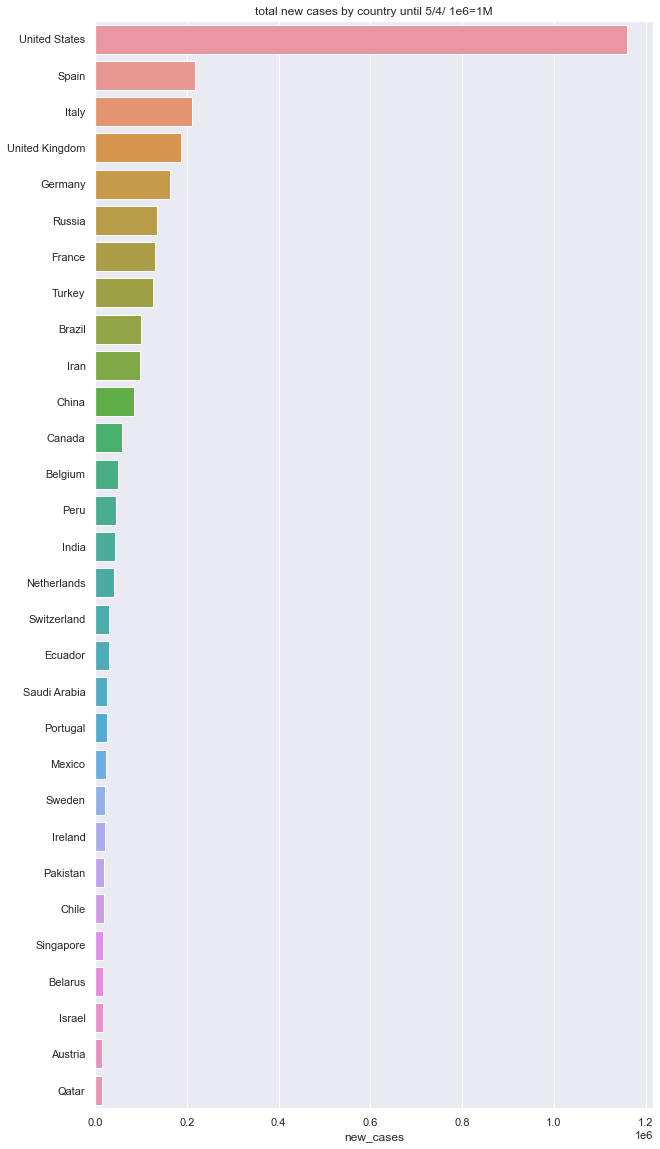

In [107]:
plt.figure(figsize=(10,20))
sns.barplot(y=countries, x=df_c_30)
# plt.barh(countries,df_c)
# plt.xlabel('No_suicide/100k pop')
# plt.ylabel('Countries')
plt.title('total new cases by country until 5/4/ 1e6=1M')

plt.show()


In [103]:
pivot_df_c=ndf.pivot_table('total_cases_per_million', index='date', columns='location')

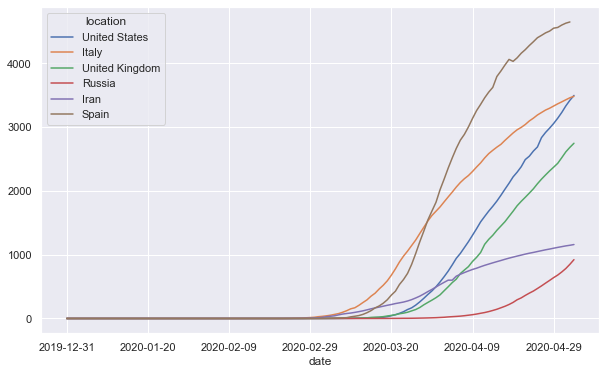

In [106]:
pivot_df_c[['United States', 'Italy', 'United Kingdom', 'Russia','Iran','Spain']].plot(figsize=(10,6))

In [167]:
pivot_df_newcases=ndf.pivot_table('new_cases', index='date',aggfunc=np.sum)

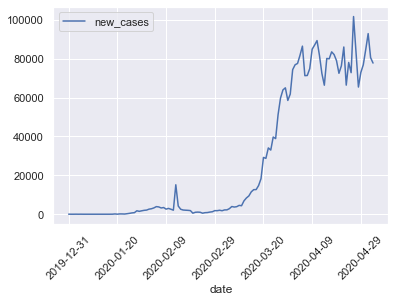

In [222]:
pivot_df_newcases.plot()
plt.xticks(rotation=45)
plt.show()

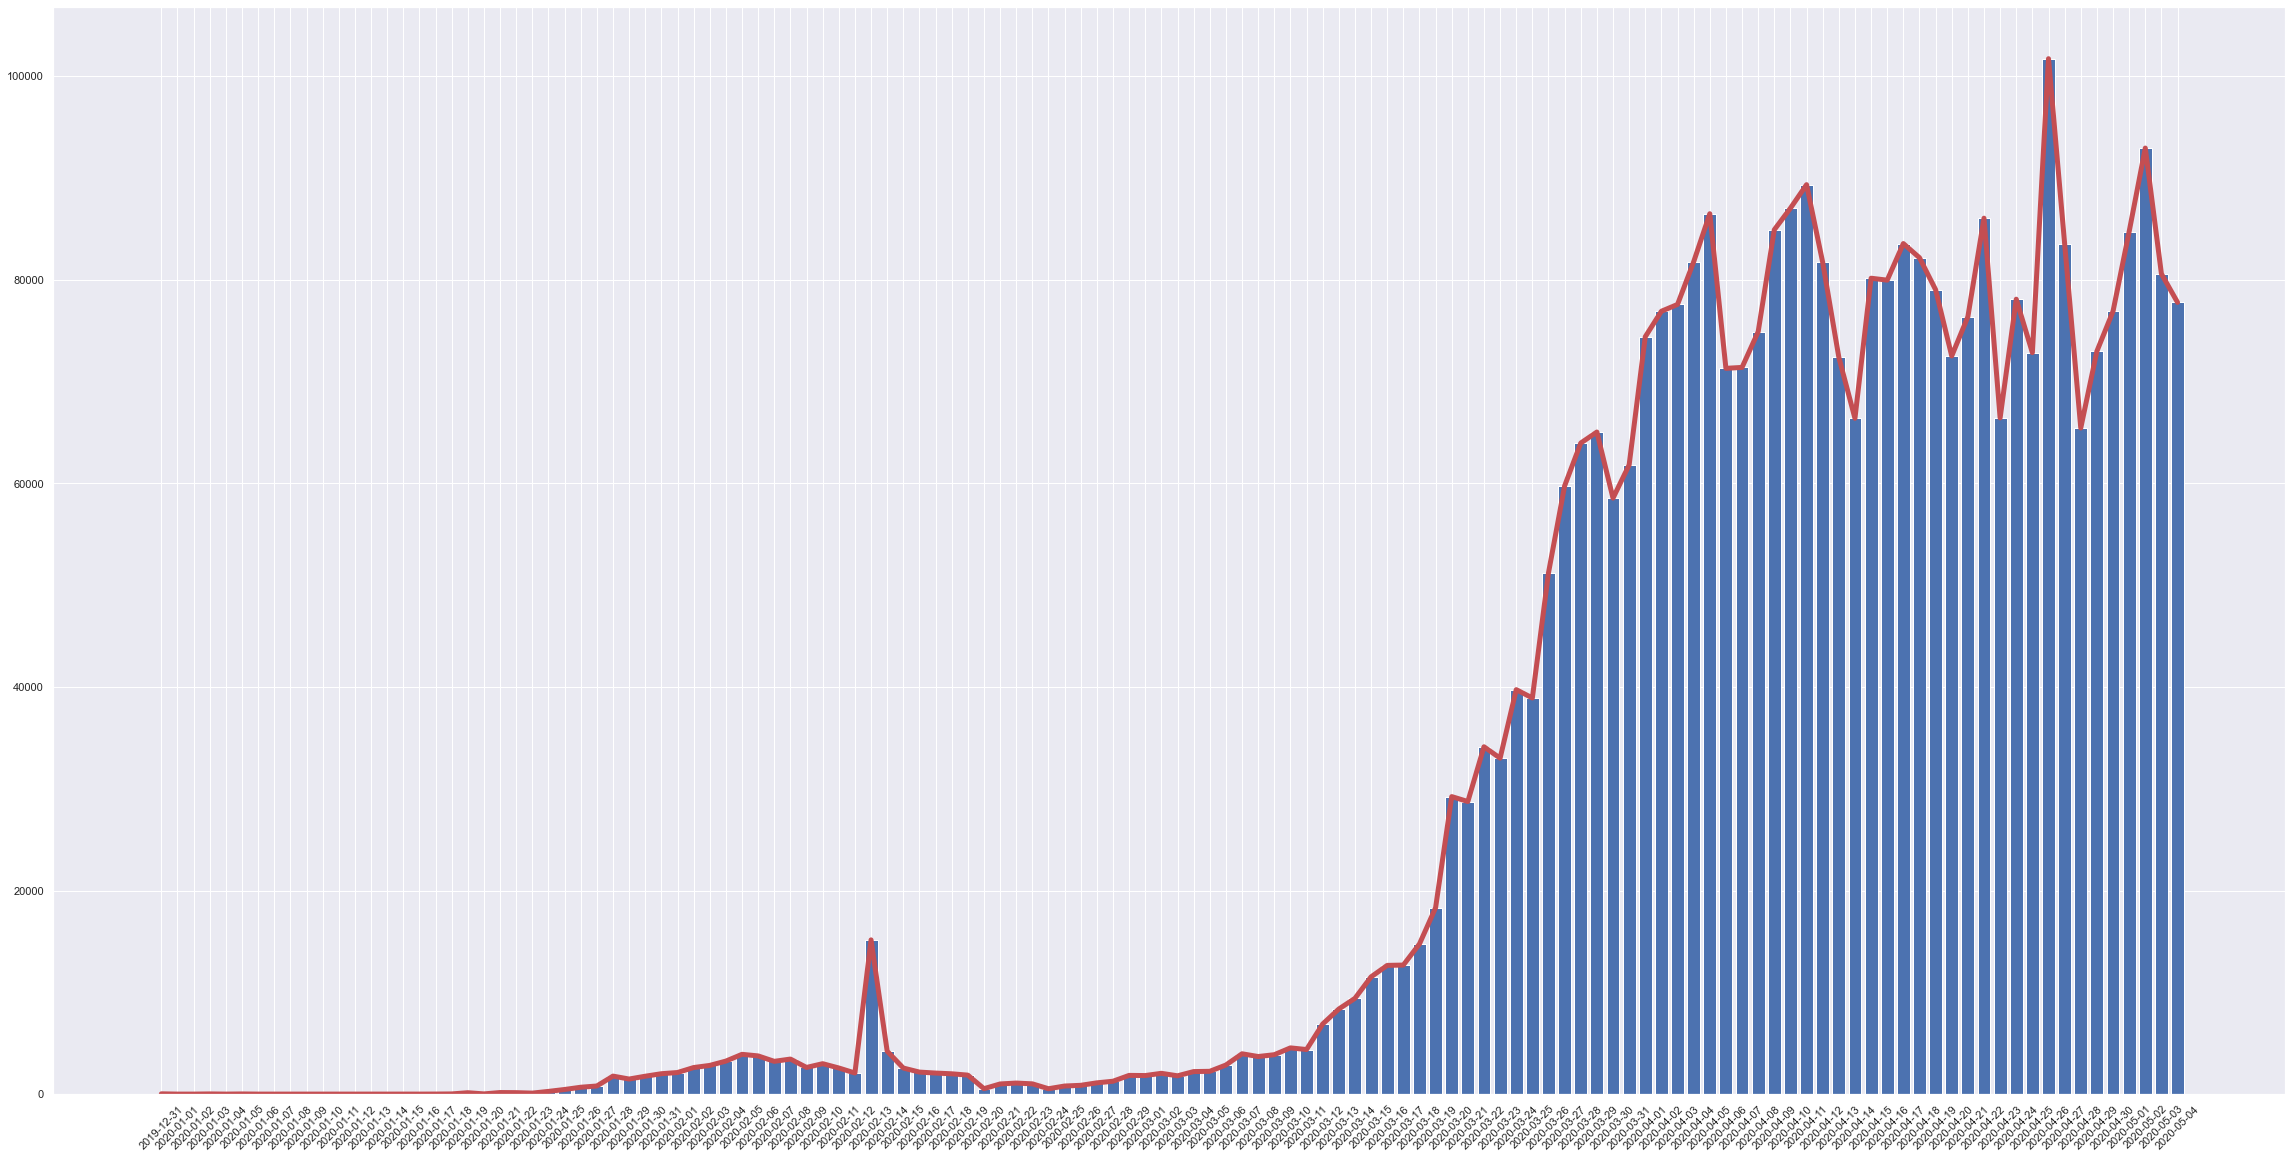

In [210]:

x = pivot_df_newcases.index.values
y = pivot_df_newcases.values
y = y.reshape(126,)

plt.subplots(figsize=(40,20))
plt.plot(x,y,'r-',linewidth=5)
plt.bar(x,y)
# ax.set(title='Globale New cases', ylabel='New cases', xlabel='date')

plt.xticks(rotation=45)
plt.show()

In [169]:
pivot_df_totalcases=ndf.pivot_table('total_cases', index='date',aggfunc=np.sum)

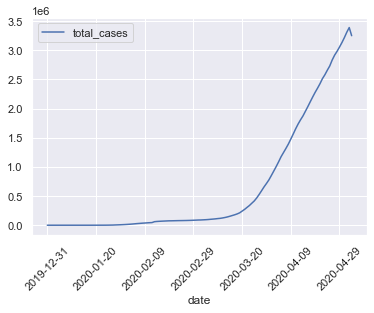

In [185]:
pivot_df_totalcases.plot()
plt.xticks(rotation=45)

plt.show()

In [224]:
x = np.array([[1, 2, 3],[1, 2, 3]]) 
y = np.array([[1, 1, 1],[1, 2, 3]]) 
z = x - y

In [225]:
z

array([[0, 1, 2],
       [0, 0, 0]])

In [12]:
x = 4
if x > 6 : 
    print("high") 
elif x > 3 : print("ok") 
else : print("low") 

ok


In [229]:
df

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15123,NaN,International,2020-02-28,705,0,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15124,NaN,International,2020-02-29,705,0,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15125,NaN,International,2020-03-01,705,0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15126,NaN,International,2020-03-02,705,0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
df.loc[4]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [234]:
df.iloc[3:4]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN


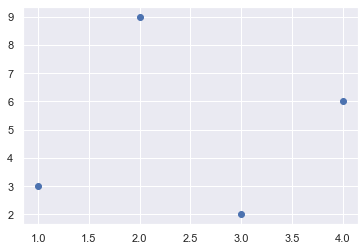

In [238]:
a = [1, 2, 3, 4] 
b = [3, 9, 2, 6] 
plt.scatter(a, b)

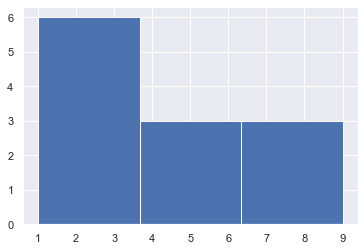

Text(0.5, 1.0, 'yyyy')

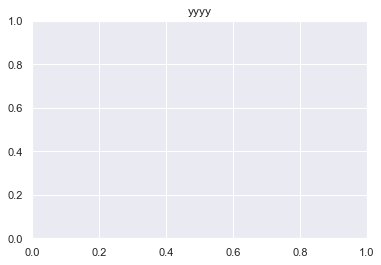

In [21]:


x = [1, 3, 6, 3, 2, 7, 3, 9, 7, 5, 2, 4]
plt.hist(x,bins=3) 
plt.show()

plt.title('yyyy')

In [20]:
df.sort_values('new_cases', ascending=False)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
15055,NaN,World,2020-04-26,2832459,101716,205303,6249,363.378,13.049,26.338,0.802,NaN,NaN,NaN,NaN,NaN
15061,NaN,World,2020-05-02,3308966,92935,238707,5856,424.509,11.923,30.624,0.751,NaN,NaN,NaN,NaN,NaN
15040,NaN,World,2020-04-11,1653160,89341,103890,7221,212.085,11.462,13.328,0.926,NaN,NaN,NaN,NaN,NaN
15039,NaN,World,2020-04-10,1563819,87027,96669,7445,200.623,11.165,12.402,0.955,NaN,NaN,NaN,NaN,NaN
15034,NaN,World,2020-04-05,1174306,86484,65181,6145,150.653,11.095,8.362,0.788,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,FJI,Fiji,2020-04-23,18,0,0,0,20.079,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
15127,NaN,International,2020-03-10,696,-9,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8768,LTU,Lithuania,2020-04-29,1344,-105,44,3,493.702,-38.570,16.163,1.102,118201.0,6392.0,43.42,2.348,samples tested
11638,PRT,Portugal,2020-05-03,25190,-161,1023,16,2470.405,-15.789,100.327,1.569,NaN,NaN,NaN,NaN,NaN


In [25]:
x = [1, 3, 6, 3, 2, 7, 3, 9, 7, 5, 2, 4]
x.sort()

In [27]:
sorted(x)

[1, 2, 2, 3, 3, 3, 4, 5, 6, 7, 7, 9]

In [47]:
x =np.random.randint(100)

In [50]:
type(df['new_cases'])

pandas.core.series.Series

In [74]:
y=np.array(df['new_cases'])

In [81]:
df['new_cases'].nlargest(20)

15055    101716
15061     92935
15040     89341
15039     87027
15034     86484
15051     86046
15038     84911
15060     84729
15046     83552
15056     83536
15047     82163
15033     81759
15041     81708
15062     80583
15044     80147
15045     79959
15048     79024
15053     78087
15063     77772
15032     77572
Name: new_cases, dtype: int64

In [82]:
df.loc[15055]

iso_code                           NaN
location                         World
date                        2020-04-26
total_cases                    2832459
new_cases                       101716
total_deaths                    205303
new_deaths                        6249
total_cases_per_million        363.378
new_cases_per_million           13.049
total_deaths_per_million        26.338
new_deaths_per_million           0.802
total_tests                        NaN
new_tests                          NaN
total_tests_per_thousand           NaN
new_tests_per_thousand             NaN
tests_units                        NaN
Name: 15055, dtype: object

## Predictor(use Total cases to predict total deaths)

In [157]:
import pandas as pd
import numpy as np

df = pd.read_csv('owid-covid-data.csv')

In [116]:
df.head(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15128 entries, 0 to 15127
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  14938 non-null  object 
 1   location                  15128 non-null  object 
 2   date                      15128 non-null  object 
 3   total_cases               15128 non-null  int64  
 4   new_cases                 15128 non-null  int64  
 5   total_deaths              15128 non-null  int64  
 6   new_deaths                15128 non-null  int64  
 7   total_cases_per_million   14836 non-null  float64
 8   new_cases_per_million     14836 non-null  float64
 9   total_deaths_per_million  14836 non-null  float64
 10  new_deaths_per_million    14836 non-null  float64
 11  total_tests               3747 non-null   float64
 12  new_tests                 3347 non-null   float64
 13  total_tests_per_thousand  3747 non-null   float64
 14  new_te

In [118]:
df.isnull().sum()

iso_code                      190
location                        0
date                            0
total_cases                     0
new_cases                       0
total_deaths                    0
new_deaths                      0
total_cases_per_million       292
new_cases_per_million         292
total_deaths_per_million      292
new_deaths_per_million        292
total_tests                 11381
new_tests                   11781
total_tests_per_thousand    11381
new_tests_per_thousand      11776
tests_units                 11381
dtype: int64

In [159]:
df=df[df.location != 'World']

In [160]:
pdf = df.pivot_table(['total_cases', 'total_deaths'], index='date',aggfunc='sum')
pdf.tail(5)

,total_cases,total_deaths
date,,
2020-04-30,3130606,227312
2020-05-01,3215335,232844
2020-05-02,3308270,238700
2020-05-03,3388853,243469
2020-05-04,3249159,221708


In [145]:
x = np.array(pdf['total_cases'].reset_index(drop=True))

In [146]:
y = np.array(pdf['total_deaths'].reset_index(drop=True))

In [147]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [148]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(100,)
(26,)
(100,)
(26,)


In [149]:
x_train= x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [150]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 1)
(26, 1)
(100, 1)
(26, 1)


In [151]:
from sklearn.linear_model import Lasso
model = Lasso()

In [152]:
model.fit(x_train,y_train)

Lasso()

In [153]:
y_predict_train = model.predict(x_train)

In [154]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_predict_train))

0.993275798251033


In [155]:
y_predict_test = model.predict(x_test)

In [156]:
print(r2_score(y_test,y_predict_test))

0.9905101301065871


In [48]:
x = pdf['total_cases'].reset_index(drop=True)

In [49]:
y = pdf['total_deaths'].reset_index(drop=True)

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [57]:
x_train.head(4)

69      218432
39       69866
121    6261908
66      195526
Name: total_cases, dtype: int64

In [58]:
x_train= x_train.to_numpy().reshape(-1,1)

In [59]:
x_train[0:2]

array([[218432],
       [ 69866]])

In [60]:
y_train=y_train.to_numpy().reshape(-1,1)

In [70]:
from sklearn.linear_model import Lasso
model = Lasso()


In [71]:
model.fit(x_train,y_train)

Lasso()

In [72]:
y_predict_train = model.predict(x_train)

In [75]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_predict_train))

0.9933847730677198


In [76]:
x_test= x_test.to_numpy().reshape(-1,1)

In [78]:
y_test=y_test.to_numpy().reshape(-1,1)

In [77]:
y_predict_test = model.predict(x_test)

In [79]:
print(r2_score(y_test,y_predict_test))

0.9904080225633028


In [3]:
a = 2